# Ejercicio 40
Proceso con vapor de agua, la variación de entropía entre entrada y salida de la turbina es 3,2 kW/K.

Determinar:
1. $\dot{W}$
2. $\eta_{iso(s)}$

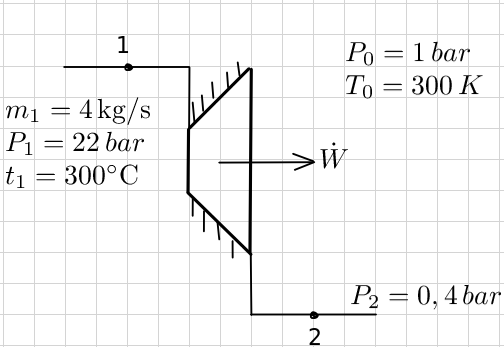

## Solución

In [ ]:
# Datos:
P_1 = 22e5 # [Pa]
T_1 = 300 + 273.15 # [K]
m = 4 # [kg/s]
P_2 = 0.4e5 # [Pa]
P_0 = 1e5 # [Pa]
T_0 = 300 # [K]
DS_s = 3.2e3 # [W/K]

In [ ]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 11.1 MB/s 


In [ ]:
cp.PhaseSI('P',P_1,'T',T_1,'Water')

'gas'

In [ ]:
h_1 = cp.PropsSI('H','P',P_1,'T',T_1,'Water')
s_1 = cp.PropsSI('S','P',P_1,'T',T_1,'Water')

In [ ]:
#@title
print('h_1 = %.2f [kJ/kg]'%(h_1/1000))
print('s_1 = %.4f [kJ/(kg·K)]'%(s_1/1000))

h_1 = 3018.42 [kJ/kg]
s_1 = 6.7167 [kJ/(kg·K)]


$$ \Delta S_u = \overbrace{\Delta S_m}^{\equiv \, 0} + \Delta S_s $$

$\Delta S_m \, \rightarrow \, 0$, porque la turbina es adiabática.

$$ \Delta S_u = m \, (s_2 - s_1) $$

$$ s_2 = \frac{\Delta S_u}{m} + s_1 $$

In [ ]:
DS_u = DS_s
s_2 = DS_u/m + s_1

In [ ]:
#@title
print('s_2 = %.4f [kJ/(kg·K)]'%(s_2/1000))

s_2 = 7.5167 [kJ/(kg·K)]


In [ ]:
cp.PhaseSI('P',P_2,'S',s_2,'Water')

'twophase'

Estado del vapor en 2, (real)
$$ x_2 = \frac{s_2 - s'}{s'' - s'} $$

In [ ]:
sp1 = cp.PropsSI('S','P',P_2,'Q',0,'Water')
sp2 = cp.PropsSI('S','P',P_2,'Q',1,'Water')

In [ ]:
x_2 = (s_2 - sp1)/(sp2 - sp1)

In [ ]:
#@title
print('x_2 = %.4f'%x_2)

x_2 = 0.9771


In [ ]:
# o también x_2
cp.PropsSI('Q','P',P_2,'S',s_2,'Water')

0.9770782418099017

$$ h_{2real} = x_{2real} \, (h'' -h') + h' $$

In [ ]:
hp1 = cp.PropsSI('H','P',P_2,'Q',0,'Water')
hp2 = cp.PropsSI('H','P',P_2,'Q',1,'Water')

In [ ]:
h_2 = x_2*(hp2 - hp1) + hp1

In [ ]:
#@title
print('h_2 = %.2f [kJ/kg]'%(h_2/1000))

h_2 = 2582.91 [kJ/kg]


In [ ]:
# o también
cp.PropsSI('H','P',P_2,'S',s_2,'Water')/1000

2582.9088612337355

Potencia
$$ \dot{W} = \dot{m} \, (h_1 - h_2) $$

In [ ]:
W = m*(h_1 - h_2)

In [ ]:
#@title
print('W = %.2f [kW]'%(W/1000))

W = 1742.03 [kW]


Rendimiento isoentrópico

$$ \eta_{iso(s)} = \frac{\dot{W}_{real}}{\dot{W}_{ideal}} = \frac{h_1 - h_2}{h_1 - h_{2rev}} $$

Averiguamos el $x_{2rev}$

$$ x_{2rev} = \frac{s_{2rev} - s'}{s'' - s'} $$

In [ ]:
s_2rev = s_1
x_2rev = (s_2rev - sp1)/(sp2 - sp1)

In [ ]:
#@title
print('x_2rev = %.4f'%x_2rev)

x_2rev = 0.8566


Luego $h_{2rev}$

$$ h_{2rev} = x_{2rev} \, (h'' - h') + h' $$

In [ ]:
h_2rev = x_2rev*(hp2 - hp1) + hp1

In [ ]:
#@title
print('h_2rev = %.2f [kJ/kg]'%(h_2rev/1000))

h_2rev = 2303.70 [kJ/kg]


Rendimiento

$$ \eta_{iso} = \frac{h_1 - h_{2real}}{h_1 - h_{2rev}} $$

In [ ]:
n_iso = (h_1 - h_2)/(h_1 - h_2rev)

In [ ]:
#@title
print('n_iso = %.5f'%n_iso)

n_iso = 0.60935


Variación de entropía del Universo

$$ \Delta S_u = \underbrace{\Delta S_m}_{\equiv \, 0} + \Delta S_s $$

$\Delta S_m = 0$, porque la turbina es adiabática.

$$ \Delta S_u = m \, (s_{2real} - s_1) $$

In [ ]:
DS_u = DS_s

In [ ]:
#@title
print('DS_u = %.2f [kJ/K·s]'%(DS_u/1000))

DS_u = 3.20 [kJ/K·s]


Trabajo perdido

$$ \dot{W}_{perd} = T_0 \Delta S_u $$

In [ ]:
W_perd = T_0*DS_u

In [ ]:
#@title
print('W_perd = %.1f [kJ]'%(W_perd/1000))

W_perd = 960.0 [kJ]
